In [16]:
from pprint import pprint
!pip install emoji

# Setup
import os
import re
import time

import emoji
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import sklearn
from keras_preprocessing.sequence import pad_sequences
from keras_preprocessing.text import Tokenizer
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.utils.validation import check_is_fitted

%matplotlib inline
sns.set_style('white')
sns.set_context('notebook')

random_state = 143

  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171051 sha256=7e326f94e4d2a269d7596406464ebd1b91160cfd2f2c0dc077c6db981bd0ed9e
  Stored in directory: c:\users\ashlin_rajan\appdata\local\pip\cache\wheels\fa\7a\e9\22dd0515e1bad255e51663ee513a2fa839c95934c5fc301090
Successfully built emoji


In [19]:
def load_emotion_data(dataset):
    """
    Loads the required dataset from the emotions input
    :param dataset:
    :return:
    """
    base_path = './1.Data/'
    dataset_name = 'emotion-labels-%s.csv' % dataset

    data = pd.read_csv(os.path.join(base_path, dataset_name))
    return data['text'].values, data['label'].values

train_X, train_y = load_emotion_data('train')
val_X, val_y = load_emotion_data('val')
test_X, test_y = load_emotion_data('test')


In [ ]:
#execute emoticon dictionary ->FInd it last

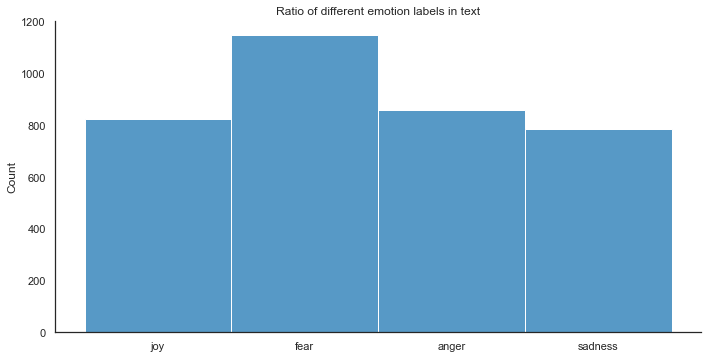

In [21]:
# Labels
sns.displot(train_y, height=5, aspect=2)
plt.title('Ratio of different emotion labels in text')
plt.show()

In [22]:
vectorizer = CountVectorizer()
vectorizer.fit(train_X)



CountVectorizer()

     word  count  length
0    just   4798       4
1     got   3769       3
2    back    842       4
3    from   3488       4
4  seeing   7917       6


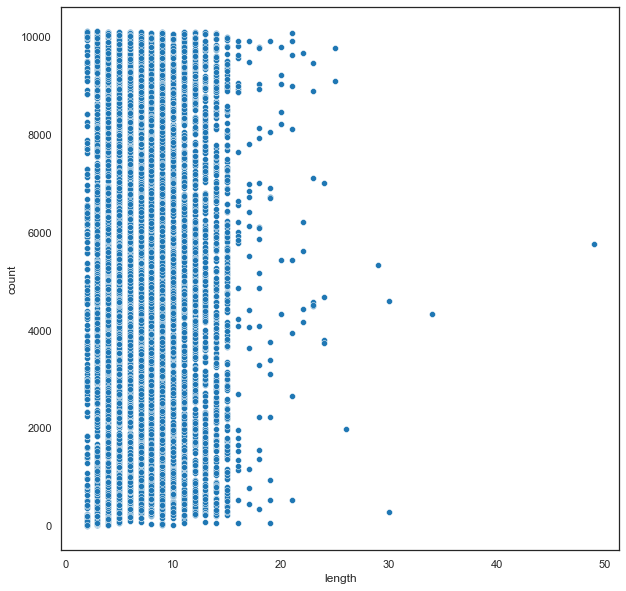

In [24]:
vocabulary = pd.DataFrame(vectorizer.vocabulary_.items(), columns=['word', 'count'])
vocabulary['length'] = vocabulary.apply(lambda x: len(x[0]), axis=1)


print(vocabulary.head())

plt.figure(figsize=(10, 10))
sns.scatterplot(data=vocabulary, x='length', y='count')
plt.show()

In [25]:
#Baseline

In [26]:
def test_classifiers(classifiers, X, y, output=True):
    best_classifier = None
    best_score = 0
    for _clf in classifiers:
        try:
            clf = sklearn.clone(_clf)
            start = time.time()
            scores = cross_val_score(clf, X, y)

            if output:
                print('Using classifier:', clf)
                print('\ttime:', time.time() - start)
                print('\tscores:', scores)
                print('\tbest:', np.max(scores))
                print('\taverage:', np.average(scores))

            max_score = np.average(scores)
            if max_score > best_score:
                best_score = max_score
                best_classifier = clf
        except Exception as e:
            print('** FAILED ** classifier', _clf)
            print(e)

    print('Fitting best classifier')
    best_classifier.fit(X, y)
    y_pred = best_classifier.predict(X)

    conf_matrix = confusion_matrix(y, y_pred, normalize='true')

    plt.figure(figsize=(10, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='.4f')
    plt.show()

    return best_classifier, best_score




In [27]:
classifiers = [
    KNeighborsClassifier(),
    LinearSVC(max_iter=10000, random_state=random_state),
    RandomForestClassifier(random_state=random_state, n_jobs=8),
    # MLPClassifier(random_state=random_state), # Takes a long time
]
prep_pipeline = Pipeline([
    ('vectorizer', CountVectorizer())
])



Just got back from seeing @GaryDelaney in Burslem. AMAZING!! Face still hurts from laughing so much #hilarious
  (0, 4798)	1
  (0, 3769)	1
  (0, 842)	1
  (0, 3488)	2
  (0, 7917)	1
  (0, 3593)	1
  (0, 4383)	1
  (0, 1434)	1
  (0, 507)	1
  (0, 3093)	1
  (0, 8504)	1
  (0, 4271)	1
  (0, 5051)	1
  (0, 8264)	1
  (0, 5921)	1
  (0, 4114)	1
Using classifier: KNeighborsClassifier()
	time: 0.4959125518798828
	scores: [0.36791148 0.3582296  0.41493776 0.39196676 0.36426593]
	best: 0.4149377593360996
	average: 0.37946230503097667
Using classifier: LinearSVC(max_iter=10000, random_state=143)
	time: 1.8422985076904297
	scores: [0.83679115 0.85477178 0.85338866 0.8365651  0.79916898]
	best: 0.8547717842323651
	average: 0.836137132523381
Using classifier: RandomForestClassifier(n_jobs=8, random_state=143)
	time: 14.926064491271973
	scores: [0.82572614 0.85338866 0.82849239 0.81717452 0.77146814]
	best: 0.8533886583679114
	average: 0.8192499703068548
Fitting best classifier


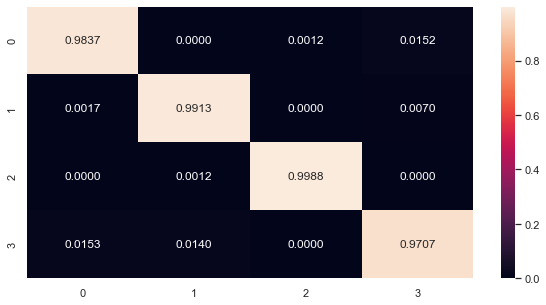

Best classifier is: LinearSVC(max_iter=10000, random_state=143) 0.836137132523381


In [28]:
train_X_transformed = prep_pipeline.fit_transform(train_X)
print(train_X[0])
print(train_X_transformed[0])

best_clf, best_score = test_classifiers(classifiers, train_X_transformed, train_y)
print('Best classifier is:', best_clf, best_score)

[[   0    0    0 ...   19  116  188]
 [   0    0    0 ...  209   59  309]
 [   0    0    0 ...  365  773  839]
 ...
 [   0    0    0 ... 1251    8  149]
 [   0    0    0 ...  251  449 4886]
 [   0    0    0 ...    7   11  100]]
Just got back from seeing @GaryDelaney in Burslem. AMAZING!! Face still hurts from laughing so much #hilarious
[21, 90, 95, 39, 569, 2546, 10, 2547, 107, 183, 75, 1221, 39, 526, 19, 116, 188]
Using classifier: KNeighborsClassifier()
	time: 0.44069671630859375
	scores: [0.30428769 0.34854772 0.39695712 0.34626039 0.29362881]
	best: 0.3969571230982019
	average: 0.33793634555924645


C:\Users\ashlin_rajan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\ashlin_rajan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\ashlin_rajan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\ashlin_rajan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\ashlin_rajan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge

Using classifier: LinearSVC(max_iter=10000, random_state=143)
	time: 43.88189125061035
	scores: [0.23651452 0.23651452 0.27524205 0.2700831  0.23545706]
	best: 0.2752420470262794
	average: 0.2507622517748838
Using classifier: RandomForestClassifier(n_jobs=8, random_state=143)
	time: 2.0011849403381348
	scores: [0.51175657 0.85892116 0.88520055 0.86565097 0.58310249]
	best: 0.8852005532503457
	average: 0.7409263495055612
Fitting best classifier


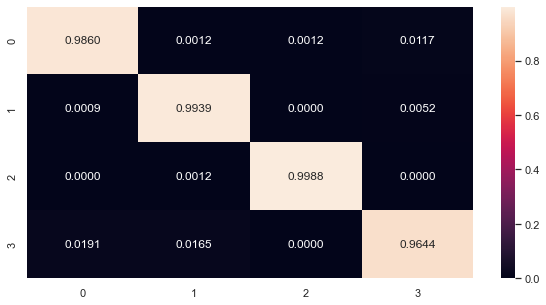

Best classifier is: RandomForestClassifier(n_jobs=8, random_state=143) 0.7409263495055612


In [29]:
# Test using Keras tokenizer
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(train_X)

train_X_transformed = tokenizer.texts_to_sequences(train_X)
train_X_padded = pad_sequences(train_X_transformed)
print(train_X_padded)

print(train_X[0])
print(train_X_transformed[0])

best_clf, best_score = test_classifiers(classifiers, train_X_padded, train_y)
print('Best classifier is:', best_clf, best_score)

In [30]:
#Preprocessing

In [32]:
"""
Removing handles (@name) as I don't want the algorithm to associate a person with sentiment.
Remove coded values (e.g. &).
Convert emojis to tokens (as those are good representation of sentiment yet are filtered by the tokenizers).
Review if there is other extraneous input like URL's or other


"""

"\nRemoving handles (@name) as I don't want the algorithm to associate a person with sentiment.\nRemove coded values (e.g. &).\nConvert emojis to tokens (as those are good representation of sentiment yet are filtered by the tokenizers).\nReview if there is other extraneous input like URL's or other\n\n\n"

In [31]:
class RemoveHandles(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        values = pd.Series(X)
        return values.replace(r'@\w+', '', regex=True).values

remove_handles = RemoveHandles()
print(remove_handles.fit_transform(train_X[:10]))

['Just got back from seeing  in Burslem. AMAZING!! Face still hurts from laughing so much #hilarious'
 "Oh dear an evening of absolute hilarity I don't think I have laughed so much in a long time! 😂"
 'Been waiting all week for this game ❤️❤️❤️ #cheer #friday ❤️'
 " : Thank you so much, Gloria! You're so sweet, and thoughtful! You just made my day more joyful! I love you too! 😊💕"
 'I feel so blessed to work with the family that I nanny for ❤️ nothing but love &amp; appreciation, makes me smile.'
 'Today I reached 1000 subscribers on YT!! , #goodday, #thankful'
 " Good morning, love! Happy first day of fall. Let's make some awesome #autumnmemories #annabailey #laughter #smile"
 "#BridgetJonesBaby is the best thing I've seen in ages! So funny, I've missed Bridget! #love  #TeamMark"
 'Just got back from seeing  in Burslem. AMAZING!! Face still hurts from laughing so much '
 ' I thought the holidays could not get any more cheerful, and then I met you. #TheNiceBot']


In [33]:
class RemoveCodedValues(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        values = pd.Series(X)
        return values.replace(r'&\w+;', '', regex=True).values

remove_coded = RemoveCodedValues()

pat = re.compile(r'&\w+;')
for f in remove_coded.fit_transform(train_X):
    found = pat.findall(f)
    if len(found) > 0:
        print(pat.findall(f))

In [34]:
class TokenizeEmoji(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.array([emoji.demojize(text) for text in X])

tokenize_emoji = TokenizeEmoji()
test = tokenize_emoji.fit_transform(train_X[:10])

vectorizer.fit(test)
print(vectorizer.vocabulary_)

{'just': 56, 'got': 45, 'back': 13, 'from': 36, 'seeing': 82, 'garydelaney': 40, 'in': 52, 'burslem': 19, 'amazing': 4, 'face': 28, 'still': 89, 'hurts': 51, 'laughing': 58, 'so': 87, 'much': 71, 'hilarious': 48, 'oh': 77, 'dear': 25, 'an': 6, 'evening': 27, 'of': 76, 'absolute': 1, 'hilarity': 49, 'don': 26, 'think': 100, 'have': 47, 'laughed': 57, 'long': 61, 'time': 104, 'face_with_tears_of_joy': 29, 'been': 14, 'waiting': 110, 'all': 3, 'week': 111, 'for': 34, 'this': 101, 'game': 38, 'red_heart': 81, 'cheer': 21, 'friday': 35, 'gardiner_love': 39, 'thank': 93, 'you': 114, 'gloria': 42, 're': 79, 'sweet': 91, 'and': 7, 'thoughtful': 103, 'made': 63, 'my': 72, 'day': 24, 'more': 69, 'joyful': 55, 'love': 62, 'too': 107, 'smiling_face_with_smiling_eyes': 86, 'two_hearts': 108, 'feel': 32, 'blessed': 16, 'to': 105, 'work': 113, 'with': 112, 'the': 96, 'family': 31, 'that': 95, 'nanny': 73, 'nothing': 75, 'but': 20, 'amp': 5, 'appreciation': 10, 'makes': 65, 'me': 66, 'smile': 85, 'tod

In [35]:
#Remove URL
class Emojifier(TransformerMixin, BaseEstimator):
    """
    Converts characters like :) :( :/ to a unique value
    """
    def __init__(self, emoji_pattern=r'[:;Xx][)(\/D]|[)(\/D][:;]'):
        self.emoji_pattern = emoji_pattern

    def fit(self, X, y=None):
        emoji_list = set()
        pattern = re.compile(self.emoji_pattern)

        for line in X:
            emoji_list.update(pattern.findall(line))


        self.found_emojis_ = {}
        for i, emoji in enumerate(emoji_list):
            self.found_emojis_[emoji] = '<EMOJI_%d>' % i

        return self

    def transform(self, X):
        # Validate
        check_is_fitted(self, ['found_emojis_'])

        # Transform
        data = pd.Series(X)
        for emoji, name in self.found_emojis_.items():
            data = data.str.replace(emoji, name, regex=False)

        return data.values

emojifier = Emojifier()
emojifier.fit(train_X)
print(emojifier.found_emojis_)

emojified_X = emojifier.transform(train_X)

{'/:': '<EMOJI_0>', ':/': '<EMOJI_1>', ':(': '<EMOJI_2>', ';)': '<EMOJI_3>', '):': '<EMOJI_4>', 'x)': '<EMOJI_5>', ':)': '<EMOJI_6>', 'xD': '<EMOJI_7>', 'XD': '<EMOJI_8>'}


In [36]:
for i, val in enumerate(train_X[:100]):
    m = re.findall(r'[:;Xx][)(\/D]|[)(\/D][:;x]', val)
    if len(m) > 0:
        print(set(m))
        print(i, val, train_y[i])
        print(i, emojified_X[i])

{':)', ';)'}
23 Online now !!!:) all day come play with me !! I'm happy happy horny playful sweet sour;) joy
23 Online now !!!<EMOJI_6> all day come play with me !! I'm happy happy horny playful sweet sour<EMOJI_3>
{':)'}
25 @itsyourgirl_Z happy birthday :) have a blessed day love from Toronto :) #bday  joy
25 @itsyourgirl_Z happy birthday <EMOJI_6> have a blessed day love from Toronto <EMOJI_6> #bday 
{':)'}
27 Morning all! Of course it is sunny on this Monday morning to cheerfully welcome us back to work.:) joy
27 Morning all! Of course it is sunny on this Monday morning to cheerfully welcome us back to work.<EMOJI_6>
{'):'}
30 Retweeted GunnySmith93 (@Stephen21Smith):\n\nDays like today I am happy to be alive! #blessed #rejoice joy
30 Retweeted GunnySmith93 (@Stephen21Smith<EMOJI_4>\n\nDays like today I am happy to be alive! #blessed #rejoice
{'):'}
48 Retweeted GunnySmith93 (@Stephen21Smith):\n\nDays like today I am happy to be alive! #blessed  joy
48 Retweeted GunnySmith93 (@Steph

Using classifier: KNeighborsClassifier()
	time: 0.5721571445465088
	scores: [0.35961272 0.39280775 0.44674965 0.36288089 0.3601108 ]
	best: 0.4467496542185339
	average: 0.3844323628464041
Using classifier: LinearSVC(max_iter=10000, random_state=143)
	time: 2.000070571899414
	scores: [0.82849239 0.86307054 0.8395574  0.82686981 0.78254848]
	best: 0.8630705394190872
	average: 0.8281077228997369
Using classifier: RandomForestClassifier(n_jobs=8, random_state=143)
	time: 5.186139345169067
	scores: [0.85200553 0.8450899  0.84094053 0.8033241  0.77146814]
	best: 0.8520055325034578
	average: 0.8225656410079576
Fitting best classifier


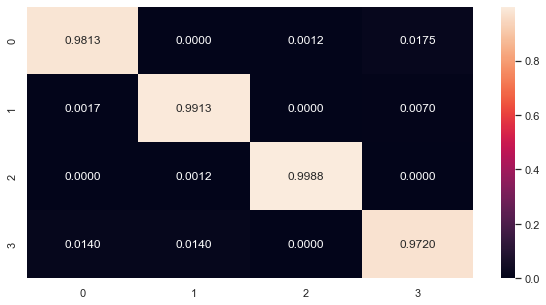

In [37]:
pipeline = Pipeline([
    ('handles', RemoveHandles()),
    ('coded', RemoveCodedValues()),
    ('emoji', TokenizeEmoji()),
    ('emojify', Emojifier()),
    ('counts', CountVectorizer())
])

prepared_train_X = pipeline.fit_transform(train_X)

best_clf, score = test_classifiers(classifiers, prepared_train_X, train_y)

Accuracy on validation: 0.8213256484149856


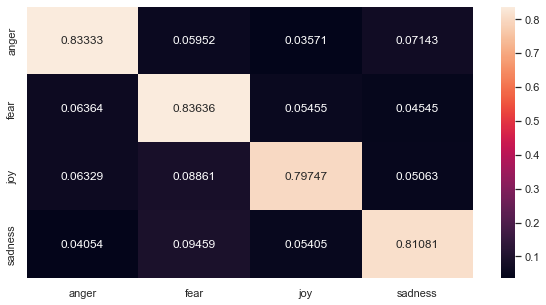

In [38]:
# Try best classifier in the validation dataset
val_X_transformed = pipeline.transform(val_X)
val_y_predicted = best_clf.predict(val_X_transformed)

accuracy = accuracy_score(val_y, val_y_predicted)
print('Accuracy on validation:', accuracy)

conf_matrix = confusion_matrix(val_y, val_y_predicted, normalize='true')
conf_matrix = pd.DataFrame(conf_matrix, columns=best_clf.classes_, index=best_clf.classes_)
# sums = np.sum(conf_matrix, axis=1, keepdims=True)


plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, fmt='.5f')
plt.show()

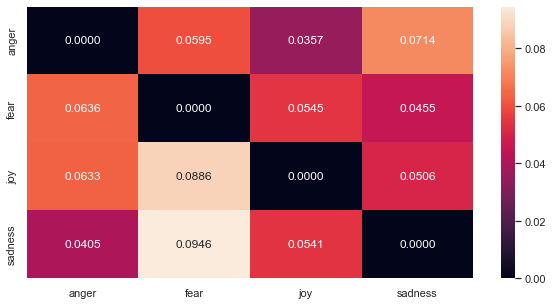

              precision    recall  f1-score   support

       anger       0.82      0.83      0.83        84
        fear       0.83      0.84      0.83       110
         joy       0.83      0.80      0.81        79
     sadness       0.80      0.81      0.81        74

    accuracy                           0.82       347
   macro avg       0.82      0.82      0.82       347
weighted avg       0.82      0.82      0.82       347

['anger' 'fear' 'joy' 'sadness']


In [39]:
# Plot the previous heatmap, but with emphasis in the errors

np.fill_diagonal(conf_matrix.values, 0)

plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, fmt='.4f')
plt.show()

print(classification_report(val_y, val_y_predicted))
print(best_clf.classes_)

In [40]:
# Check some examples of errors

errors = val_y != val_y_predicted
errors_to_show = 10

for text, label, predicted in zip(val_X[errors], val_y[errors], val_y_predicted[errors]):
    print('%s -> %s\n\t%s' % (label, predicted, text))

    errors_to_show -= 1
    if errors_to_show == 0:
        break

joy -> fear
	Nawaz Sharif is getting more funnier than @kapilsharmak9 day by day.  #challenge #kashmir #baloch
joy -> anger
	@Casper10666 I assure you there is no laughter, but increasing anger at the costs, and arrogance of Westminster.
joy -> sadness
	Somebody who has braved the storm is brewing. 
joy -> sadness
	Imagine how sad LA fans are gona be when they get eliminated...Man that's gonna be Nirvana, a religious experience rejoicing in their misery
joy -> sadness
	incredible that anthony weiner has been caught chasing a busty milkmaid across a park at double speed while jaunty music plays
joy -> fear
	@len_snart Mick nods. 'I would like that.' He went back to his food, smiling as he finished it.
joy -> fear
	@HunterDean_ [he gives a gleeful squeak and wraps around you] All mine!
joy -> fear
	@hesham786 that's the spirit 
joy -> fear
	@harrietemmett great minds think alike. 
joy -> sadness
	Dolores.' A thin lipped smile graced glossed lips as she let blues peer over at the woman. '

In [42]:
#Hyper-parameter tweaking
pipeline = Pipeline([
    ('handles', RemoveHandles()),
    ('coded', RemoveCodedValues()),
    ('emoji', TokenizeEmoji()),
    ('emojify', Emojifier()),
    ('counts', CountVectorizer()),
    ('clf', RandomForestClassifier(random_state=random_state))
])

grid_params = [{
    # 'handles': ['passthrough', RemoveHandles()], # Eliminate bias per author or mentioned people
    'coded': ['passthrough', RemoveCodedValues()],
    'emoji': ['passthrough', TokenizeEmoji()],
    'emojify': ['passthrough', Emojifier()],
    # 'clf__n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)],
    # 'clf__max_features': ['auto', 'sqrt'],
    'clf__max_depth': [int(x) for x in np.linspace(10, 100, num=4)] + [None,],
    'clf__bootstrap': [True, False]
}]

grid_search = GridSearchCV(pipeline, grid_params, scoring='accuracy',
                           refit=True, cv=5, n_jobs=16,
                           verbose=2)
grid_search.fit(train_X, train_y)

print(grid_search.best_score_, grid_search.best_estimator_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
0.8463691988214694 Pipeline(steps=[('handles', RemoveHandles()), ('coded', RemoveCodedValues()),
                ('emoji', TokenizeEmoji()), ('emojify', Emojifier()),
                ('counts', CountVectorizer()),
                ('clf',
                 RandomForestClassifier(bootstrap=False, random_state=143))])
